In [17]:
import sys
sys.path.insert(0, '..')
from mne_bids import (BIDSPath,read_raw_bids)
import mne_bids
import importlib
import mne
import ccs_eeg_utils

#ccs_eeg_utils.download_erpcore(task="P3",subject=30,localpath="../local/bids/")

bids_root = "../local/bids"
bids_root = "/bigpool/export/users/ehinger/erp-core/bids" # Bene's Server location
bids_root = "/store/data/erp-core/"
subject_id = '030'


bids_path = BIDSPath(subject=subject_id,task="P3",
                     datatype='eeg', suffix='eeg',session="P3",
                     root=bids_root)

raw = read_raw_bids(bids_path)
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()
raw.filter(0.5,50, fir_design='firwin')

Reading /store/data/erp-core/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt
Reading events from /store/data/erp-core/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming even

/tmp/ipykernel_1983997/3896480629.py:21: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/24
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/21
    Renaming event: stimulus -> stimulus/21
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/24
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> stimulus/24
    Renaming event: stimulus -> stimulus/21
    Renaming event: stimulus -> stimulus/21
    Renaming event: stimulus -> stimulus/22
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/23
    Renaming event: stimulus -> stimulus/25
    Renaming event: stimulus -> 

<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MB, data loaded>

**T:** Go through the dataset using the MNE explorer and clean it. You can use `raw.plot()` for this. If you are working from a jupyter notebook, try to use `%matplotlib qt` for better support of the cleaning window. To get an understanding how the tool works, press `help` or type `?` in the window. (Hint: You first have to add a new annotation by pressing `a`)

Opening raw-browser...


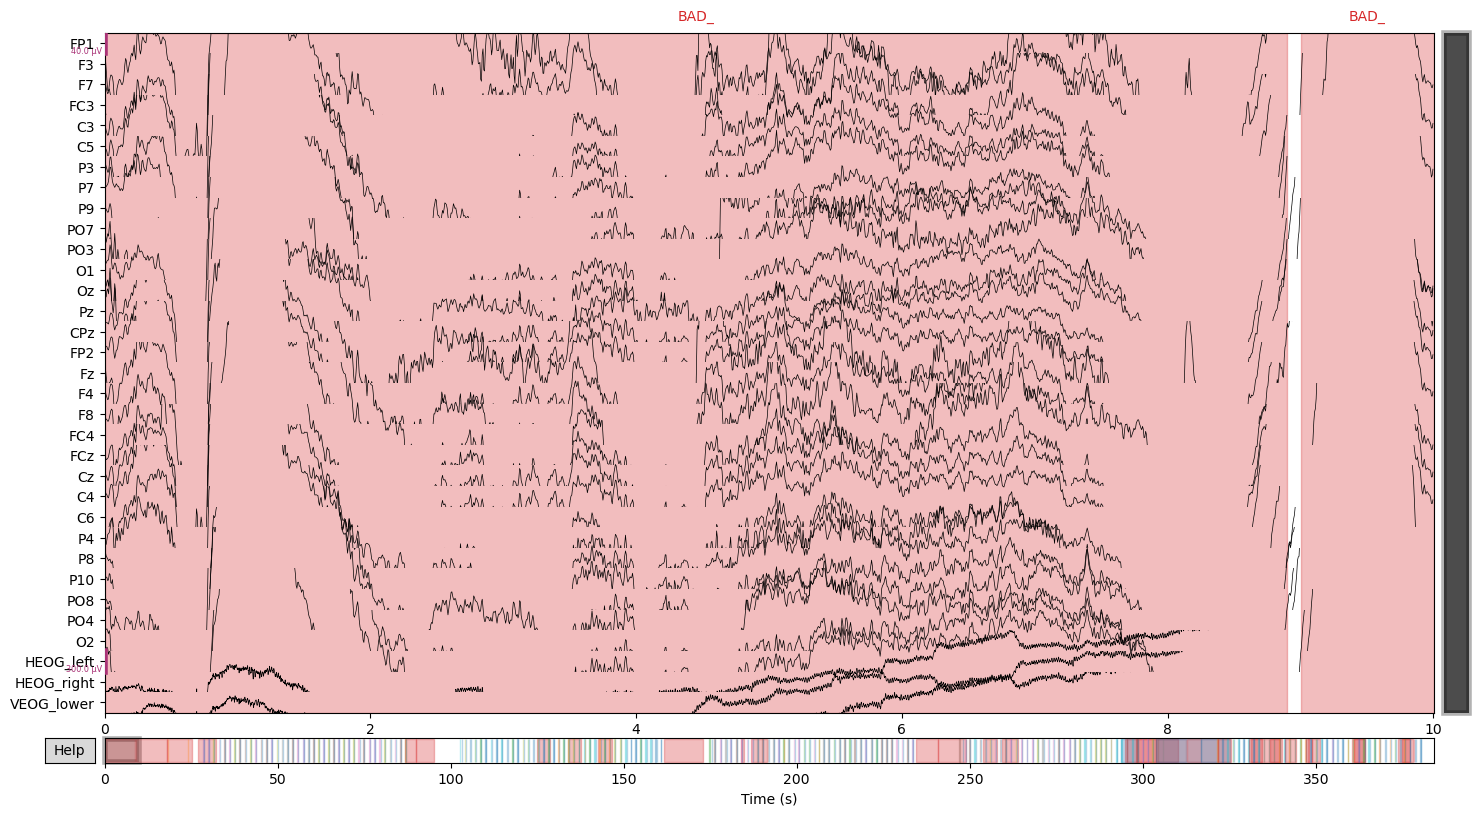

Closing raw-browser...
Channels marked as bad:
none


In [20]:
%matplotlib qt
raw.plot(n_channels=len(raw.ch_names))#,scalings =40e-6)
# See below

In [19]:
bad_ix = [i for i,a in enumerate(raw.annotations) if a['description']=="BAD_"]

#raw.annotations[bad_ix].save("sub-{}_task-P3_badannotations.csv".format(subject_id))


annotations = mne.read_annotations("sub-{}_task-P3_badannotations.csv".format(subject_id))
raw.annotations.append(annotations.onset,annotations.duration,annotations.description)


<Annotations | 431 segments: BAD_ (34), response:201 (188), response:202 ...>

Closing raw-browser...
Channels marked as bad:
none
Opening raw-browser...


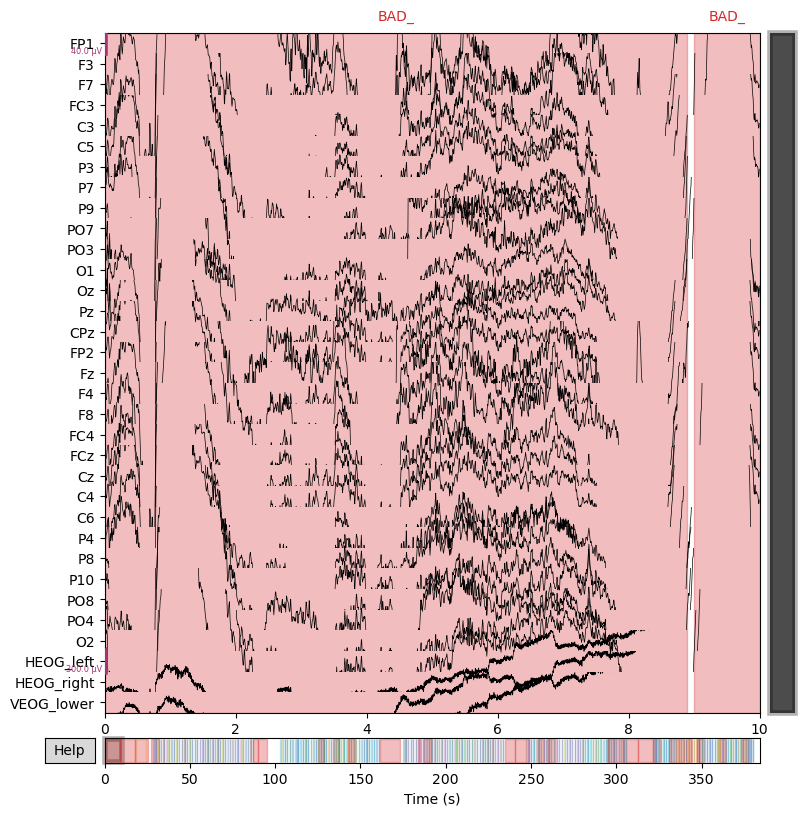

In [10]:
%matplotlib qt
raw.plot(n_channels=len(raw.ch_names))


**T:** While going through the dataset, mark what you observe as bad electrodes. Those are saved in `raw.info['bads']`. The channels can be interpolated with `raw.interpolate_bads()` or `epoch.interpolate_bads()`. Compare the channel + neighbours before and after. Did the interpolation succeed? (If you are interested in the mathematical details of spline interpolation, checkout this https://mne.tools/dev/overview/implementation.html#id26)
Hint: You need channel locations to run the interpolation which you can get by using the default-standardized channel locations `raw.set_montage('standard_1020',match_case=False)`

In [24]:
# I thought there was not really a bad channel in this dataset, so I remove one at random.
raw.info['bads'] = ['FP2']
# for interpolation
raw.set_montage('standard_1020',match_case=False)
raw.interpolate_bads()

Interpolating bad channels
    Automatic origin fit: head of radius 97.5 mm
Computing interpolation matrix from 29 sensor positions
Interpolating 1 sensors


<RawEEGLAB | sub-030_ses-P3_task-P3_eeg.fdt, 33 x 393216 (384.0 s), ~99.0 MB, data loaded>

**T:** In the epoching step, we can also specify rejection criterion for a peak-to-peak rejection method

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
    Rejecting  epoch based on EEG : ['FP1', 'F3'

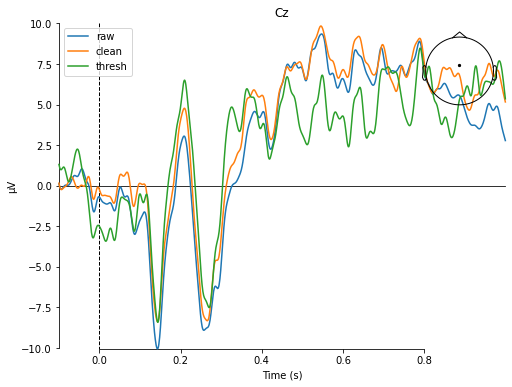

[<Figure size 576x432 with 2 Axes>]

In [25]:
%matplotlib inline
import mne
evts,evts_dict = mne.events_from_annotations(raw)
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

# get epochs with and without rejection
epochs        = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=False)
epochs_manual = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject_by_annotation=True)
reject_criteria = dict(eeg=200e-6,       # 100 µV # HAD TO INCREASE IT HERE, 100 was too harsh
                       eog=200e-6)       # 200 µV
epochs_thresh = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1,reject=reject_criteria,reject_by_annotation=False)

#from matplotlib import pyplot as plt
# compare
#plt.plot([0,:])
mne.viz.plot_compare_evokeds({'raw':epochs.average(),'clean':epochs_manual.average(),'thresh':epochs_thresh.average()},picks="Cz")


## Bonus Tasks!

In [16]:
from autoreject import AutoReject
ar = AutoReject(verbose='tqdm')
epochs.load_data()
epochs_ar = ar.fit_transform(epochs)  

Using data from preloaded Raw for 200 events and 1127 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/30 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/30 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/200 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/200 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/200 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/200 [00:00<?,       ?it/s]

/home/ehinger/miniconda3/envs/eegCourse/lib/python3.10/site-packages/mne/bem.py:965: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/home/ehinger/miniconda3/envs/eegCourse/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ehinger/miniconda3/envs/eegCourse/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ehinger/miniconda3/envs/eegCourse/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/200 [00:00<?,       ?it/s]

Dropped 68 epochs: 0, 1, 10, 11, 12, 47, 55, 56, 62, 68, 69, 72, 74, 75, 76, 77, 79, 82, 86, 89, 90, 92, 95, 102, 106, 109, 111, 113, 117, 120, 126, 129, 130, 131, 133, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 184, 186, 187, 188, 189, 196, 197, 198


In [28]:
r = ar.get_reject_log(epochs_ar)

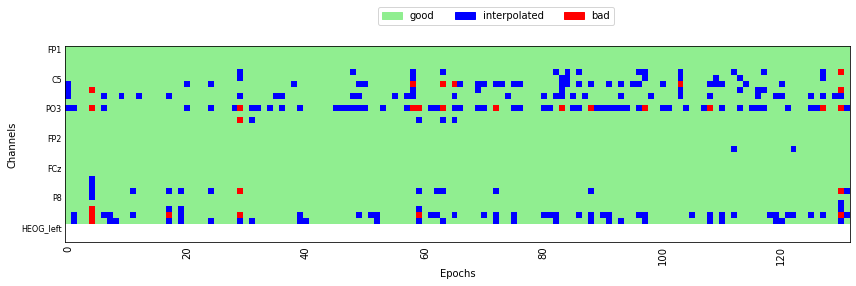

In [29]:
r.plot(orientation="horizontal");

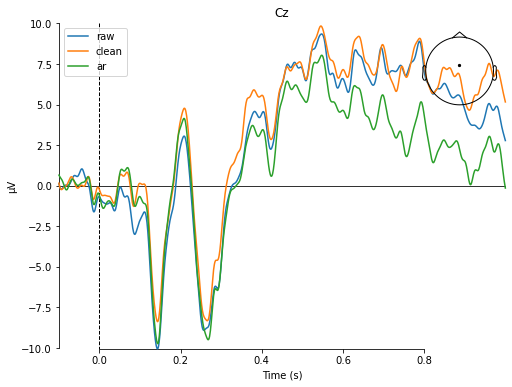

[<Figure size 576x432 with 2 Axes>]

In [30]:

mne.viz.plot_compare_evokeds({
    'raw':epochs.average(),
    'clean':epochs_manual.average(),
    'ar':epochs_ar.average()
    },picks="Cz")


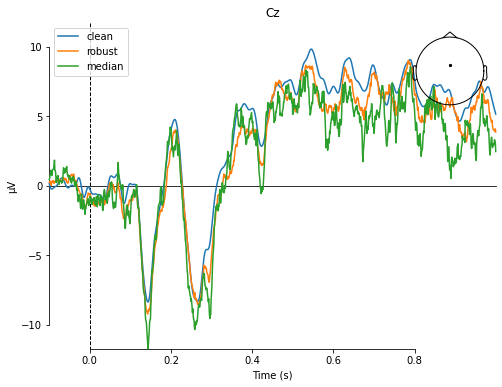

[<Figure size 576x432 with 2 Axes>]

In [36]:
from scipy.stats.mstats import winsorize
import numpy as np
def winsor(d):
    return np.mean(winsorize(d,axis=0,limits=(0.2,0.2)),axis=0)
def median(d):
    return np.median(d,axis=0)

mne.viz.plot_compare_evokeds({
    'clean':epochs_manual.average(),
    'robust':epochs.load_data().average(method=winsor),
    'median':epochs.load_data().average(method=median),
    },picks="Cz")

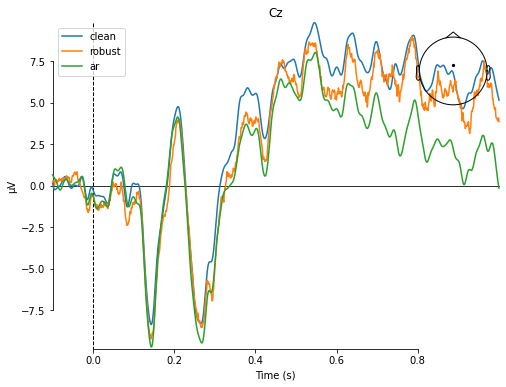

[<Figure size 576x432 with 2 Axes>]

In [37]:
mne.viz.plot_compare_evokeds({
    'clean':epochs_manual.average(),
    'robust':epochs.average(method=winsor),
    'ar':epochs_ar.average()
    },picks="Cz")

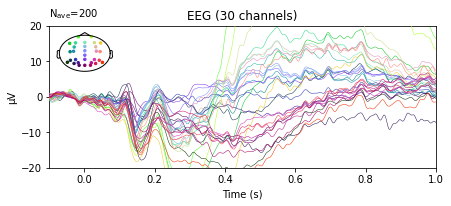

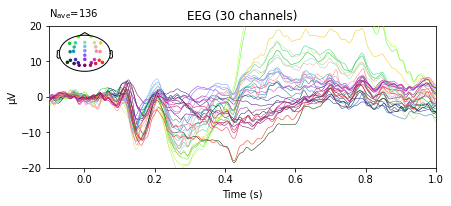

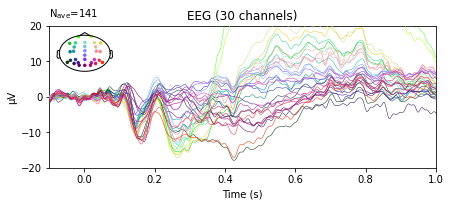

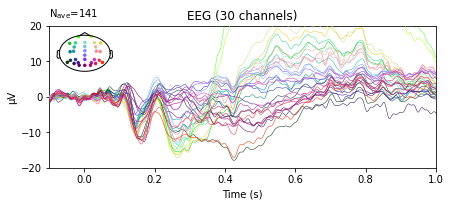

In [ ]:
%matplotlib inline
ylim = dict(eeg=(-20, 20))
epochs.average().plot(ylim=ylim, spatial_colors=True);
epochs_ar.average().plot(ylim=ylim, spatial_colors=True);
epochs_manual.average().plot(ylim=ylim, spatial_colors=True);